In [1]:
from stesml.model_tools import build_train_test_model
from stesml.model_tools import get_h_from_T_results
from stesml.model_tools import get_T_from_h_results

from stesml.data_tools import load_data
from stesml.plot_tools import plot_test_results
from stesml.plot_tools import plot_average_error

from stesml.stes_model import stes_model

/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
data_dir = "../data/Sulfur_Models/heating/heating_all"
model_type = 'XGBoost' # Options: NN, XGBoost, RandomForest
target = 'h' # Options: Tavg, h
metric = 'rmse' # Options: rmse, r2
scale = False # Normalize data to a mean of 0 and STD of 1
n_repeats = 2 # Number of times to repeat 5-fold CV. Each repeat gives a different shuffle.
t_max = -1
truncated=False

In [6]:
parameters = stes_model.get_parameters(model_type, truncated)

In [ ]:
parameters = {'learning_rate': 0.3, 'subsample': 1, 'colsample_bytree': 1, 'num_boost_round': 160}

In [7]:
result, addendum = build_train_test_model(data_dir, model_type, target, metric, scale, parameters, n_repeats, t_max=t_max)

Epoch 1/9
22811/22811 [==============================] - 12s 521us/step - loss: 0.0110 - val_loss: 1.1136e-04
Epoch 2/9
22811/22811 [==============================] - 13s 556us/step - loss: 3.8961e-05 - val_loss: 6.9912e-05
Epoch 3/9
22811/22811 [==============================] - 13s 583us/step - loss: 3.2288e-05 - val_loss: 1.2115e-04
Epoch 4/9
22811/22811 [==============================] - 14s 596us/step - loss: 2.6983e-05 - val_loss: 1.0237e-04
Split #0, This Result: 0.4978, Average Result: 0.4978
Epoch 1/9
22580/22580 [==============================] - 13s 559us/step - loss: 0.0068 - val_loss: 5.4567e-05
Epoch 2/9
22580/22580 [==============================] - 13s 587us/step - loss: 4.5437e-05 - val_loss: 4.6234e-05
Epoch 3/9
22580/22580 [==============================] - 14s 626us/step - loss: 3.3740e-05 - val_loss: 1.2712e-04
Epoch 4/9
22580/22580 [==============================] - 13s 575us/step - loss: 3.2503e-05 - val_loss: 1.0089e-04
Split #1, This Result: 0.4061, Average Res

In [8]:
# Choose the model (indexed by shuffle number) from which you would like to see results
chosen_model = addendum[3]

In [9]:
y_test = chosen_model[0]
y_hat = chosen_model[1]
scenario_index = chosen_model[2]
train_index = chosen_model[3]
test_index = chosen_model[4]

In [12]:
test_df = load_data(scenario_index, test_index, t_max=t_max)

In [13]:
test_df[target+"_hat"] = y_hat

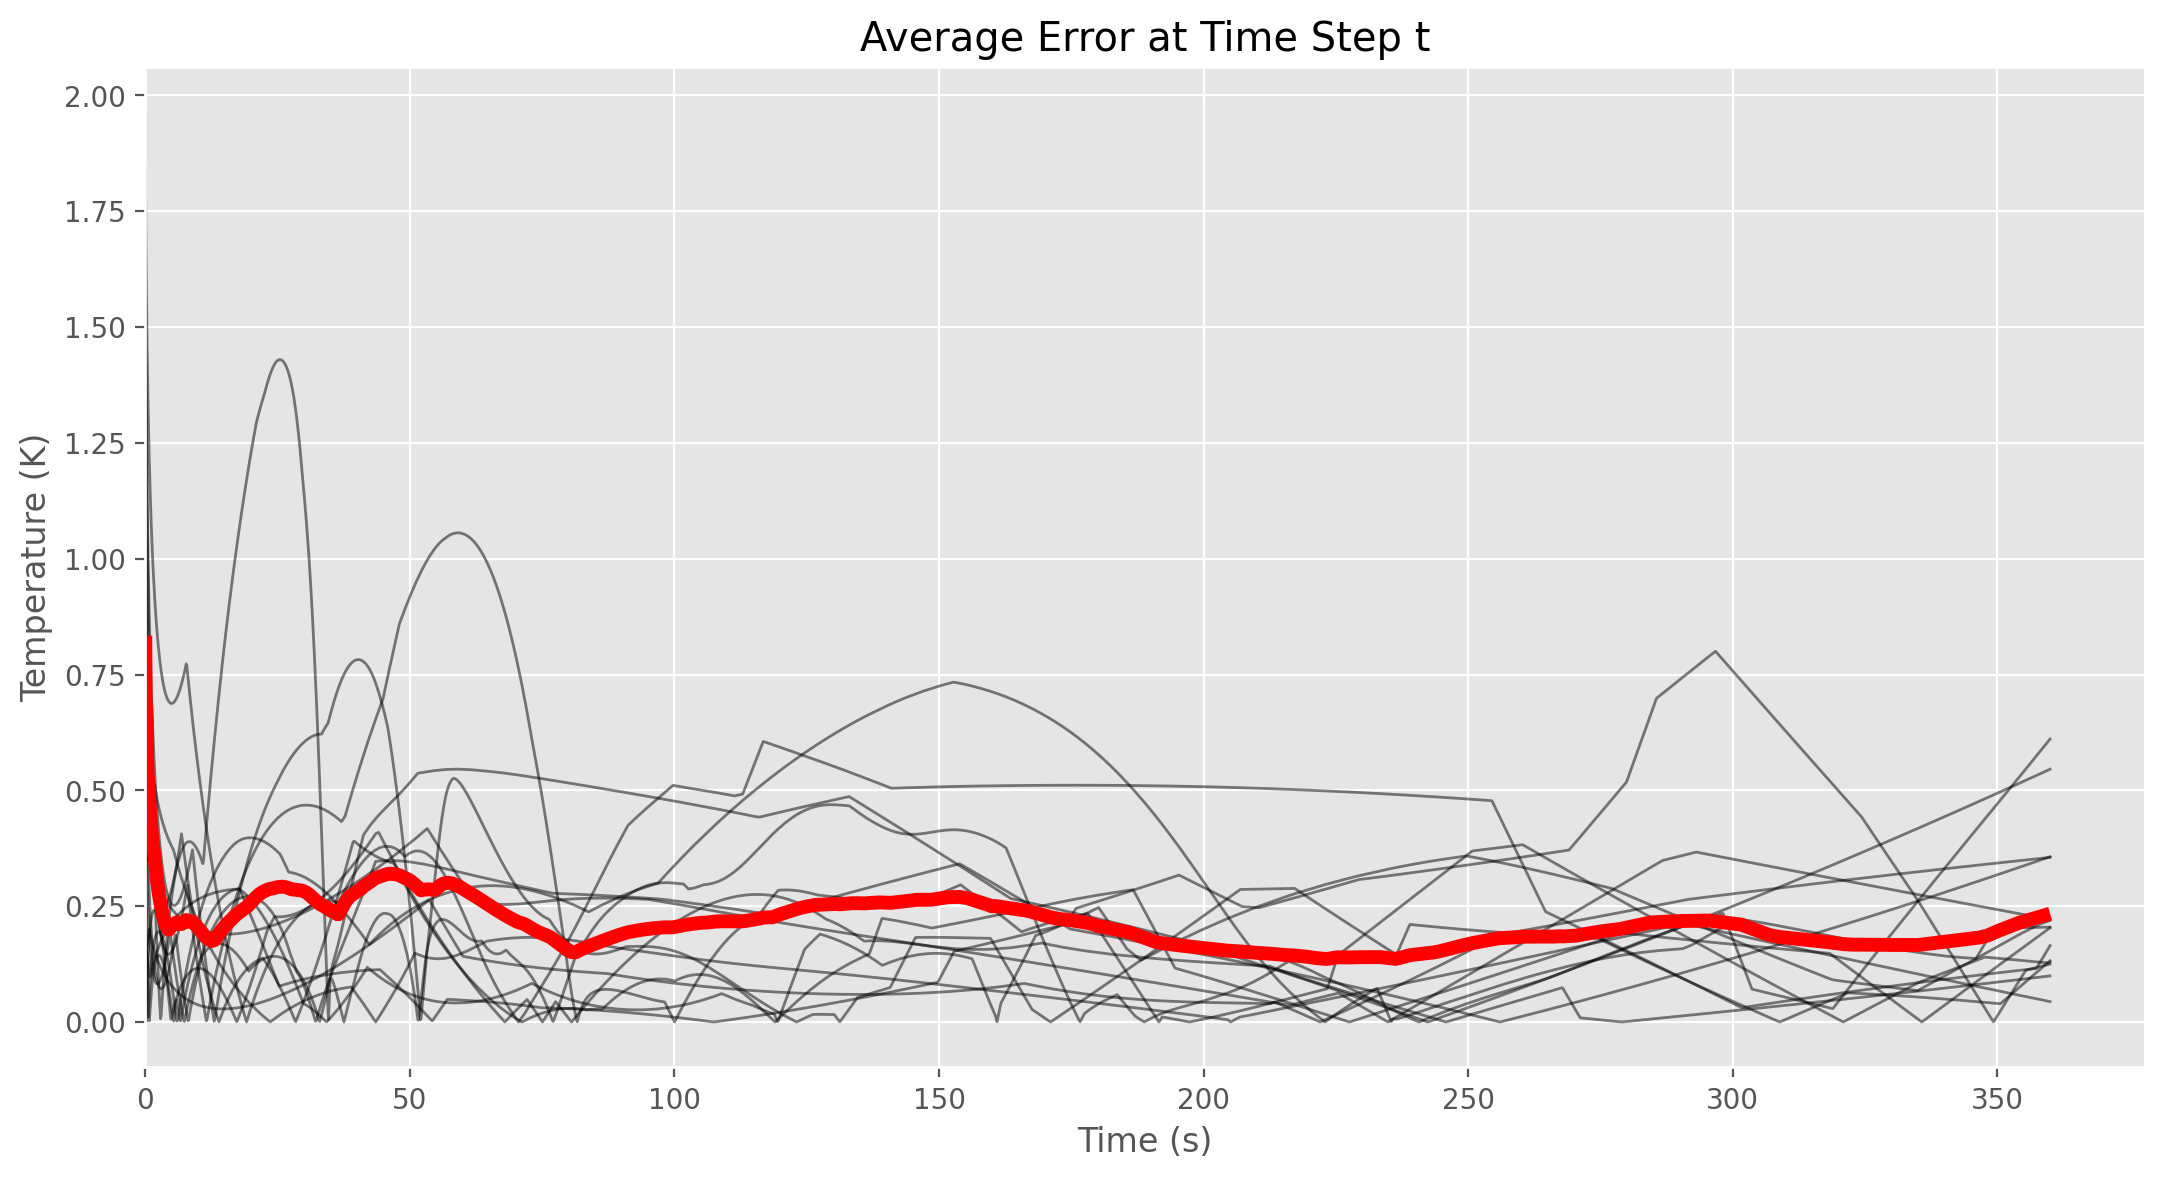

In [14]:
avg_error = plot_average_error(test_df, target=target)

<AxesSubplot:>

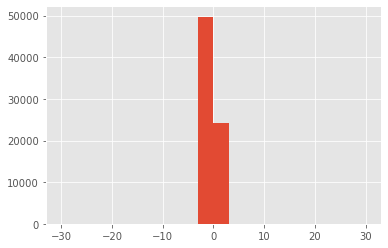

In [15]:
(test_df[target] - test_df[target+'_hat']).hist(bins=20, range=(-30, 30))

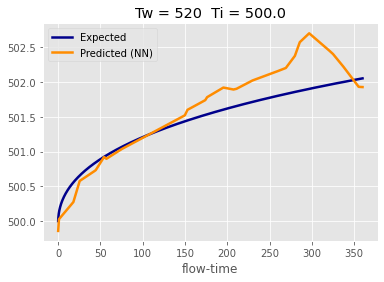

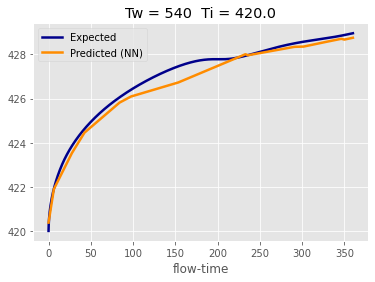

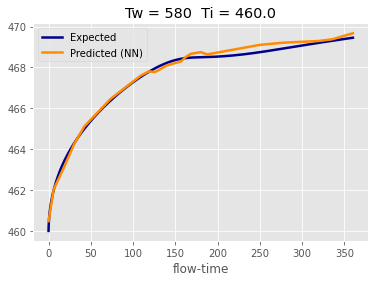

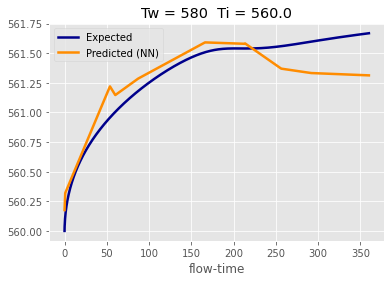

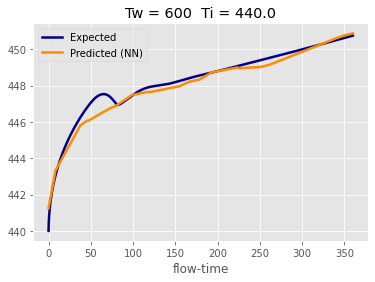

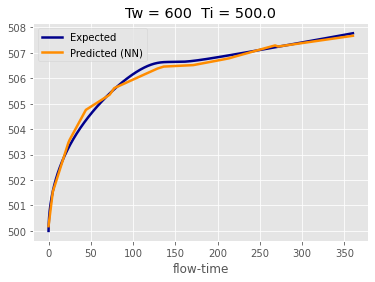

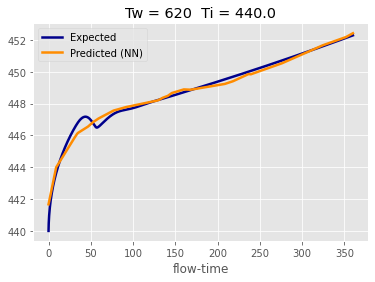

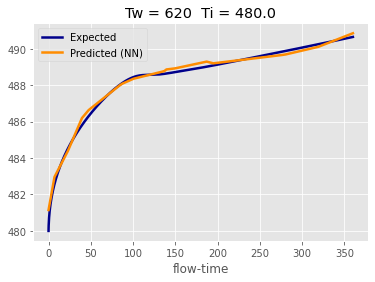

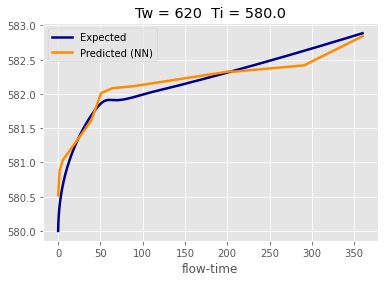

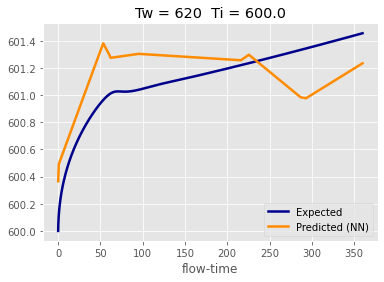

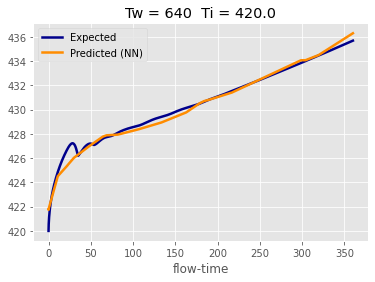

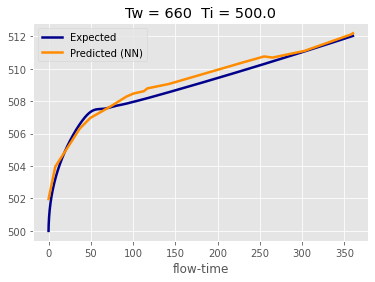

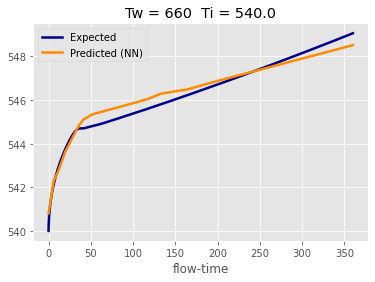

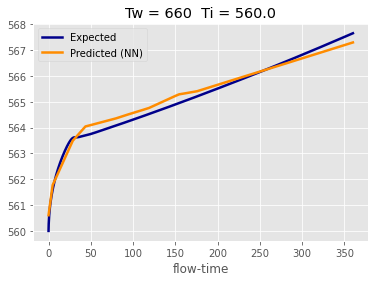

In [16]:
plot_test_results(test_df, model_type, target)

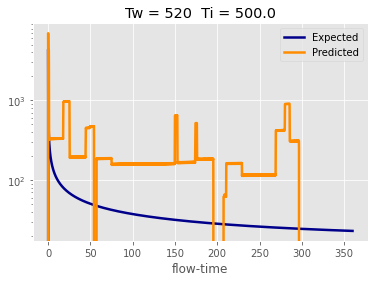

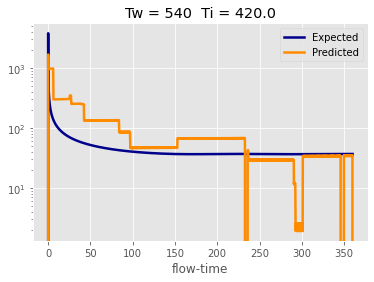

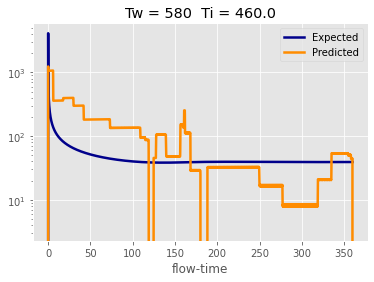

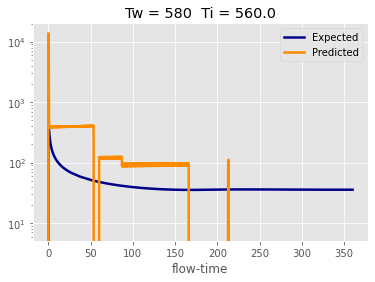

/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/stesml-0+unknown-py3.9.egg/stesml/postprocessing_tools.py:53: RuntimeWarning: invalid value encountered in true_divide


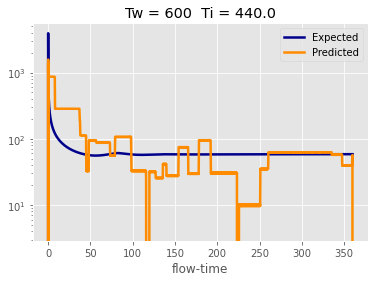

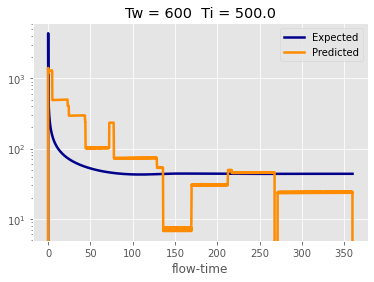

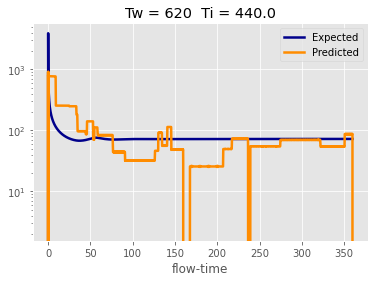

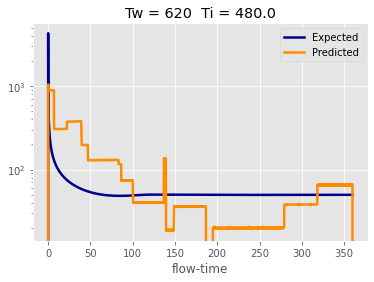

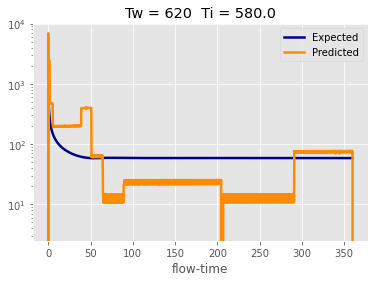

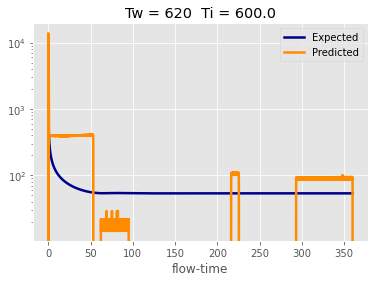

/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/stesml-0+unknown-py3.9.egg/stesml/postprocessing_tools.py:53: RuntimeWarning: invalid value encountered in true_divide


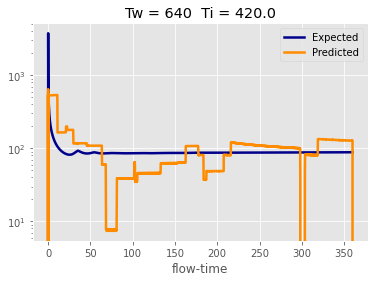

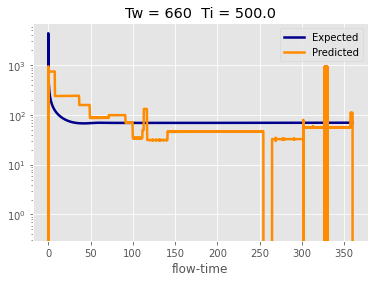

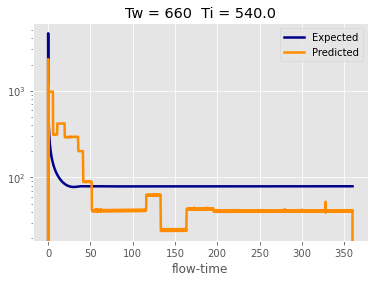

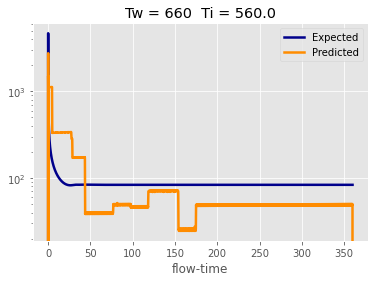

In [17]:
if target == 'Tavg':
    rmse, r2 = get_h_from_T_results(test_df, plot=True)
else:
    rmse, r2 = get_T_from_h_results(test_df, plot=True)

In [18]:
print(rmse)

233.0177875537412


In [19]:
print(r2)

-0.12692594892930686
